In [ ]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [ ]:
%cd "/content/gdrive/My Drive/PythonforDA_ANH_THUONG/Final Test"

/content/gdrive/My Drive/PythonforDA_ANH_THUONG/Final Test


# 1. Đọc dữ liệu chung

In [ ]:
#bước 1 : đọc dữ liệu đầu vào

anime = pd.read_csv("data/top_anime_dataset.csv")
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   anime_id      15000 non-null  int64  
 1   english_name  8355 non-null   object 
 2   score         15000 non-null  float64
 3   genres        13397 non-null  object 
 4   synopsis      14527 non-null  object 
 5   type          14999 non-null  object 
 6   episodes      14885 non-null  float64
 7   premiered     4686 non-null   object 
 8   producers     9568 non-null   object 
 9   studios       12617 non-null  object 
 10  source        15000 non-null  object 
 11  duration      15000 non-null  object 
 12  Age_can_read  14932 non-null  object 
 13  rank          11921 non-null  float64
 14  popularity    15000 non-null  int64  
 15  favorites     15000 non-null  int64  
 16  scored_by     15000 non-null  int64  
dtypes: float64(3), int64(4), object(10)
memory usage: 1.9+ MB


In [ ]:
# @title
anime.head()

,anime_id,english_name,score,genres,synopsis,type,episodes,premiered,producers,studios,source,duration,Age_can_read,rank,popularity,favorites,scored_by
0,52991,Frieren: Beyond Journey's End,9.31,"Adventure, Drama, Fantasy",During their decade-long quest to defeat the D...,TV,28.0,fall 2023,"Aniplex, Dentsu, Shogakukan-Shueisha Productio...",Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,1.0,160,63200,603520
1,5114,Fullmetal Alchemist: Brotherhood,9.10,"Action, Adventure, Drama, Fantasy",After a horrific alchemy experiment goes wrong...,TV,64.0,spring 2009,"Aniplex, Square Enix, Mainichi Broadcasting Sy...",Bones,Manga,24 min per ep,R - 17+ (violence & profanity),2.0,3,231928,2196353
2,9253,Steins;Gate,9.07,"Drama, Sci-Fi, Suspense",Eccentric scientist Rintarou Okabe has a never...,TV,24.0,spring 2011,"Frontier Works, Media Factory, Kadokawa Shoten...",White Fox,Visual novel,24 min per ep,PG-13 - Teens 13 or older,3.0,14,194507,1449844
3,60022,NaN,9.06,"Action, Adventure, Fantasy",Although the golden age of piracy is about to ...,TV Special,1.0,NaN,NaN,Toei Animation,Light novel,24 min,PG-13 - Teens 13 or older,4.0,2350,1970,68977
4,38524,Attack on Titan Season 3 Part 2,9.05,"Action, Drama, Suspense",Seeking to restore humanity's diminishing hope...,TV,10.0,spring 2019,"Production I.G, Dentsu, Mainichi Broadcasting ...",Wit Studio,Manga,23 min per ep,R - 17+ (violence & profanity),5.0,21,60500,1671010


In [ ]:
anime.tail()

,anime_id,english_name,score,genres,synopsis,type,episodes,premiered,producers,studios,source,duration,Age_can_read,rank,popularity,favorites,scored_by
14995,1595,Beast City,5.57,Hentai,The modern age. Albeit tales of strange things...,OVA,3.0,NaN,"Comstock, Ltd.",C and R,Light novel,41 min per ep,Rx - Hentai,NaN,10513,9,883
14996,49943,NaN,5.57,Hentai,Aima Imoko is a young college student with a h...,OVA,4.0,NaN,NaN,Mousou Senka,Manga,20 min per ep,Rx - Hentai,NaN,9348,8,1675
14997,38812,NaN,5.57,NaN,A short music video of the song Botsuraku by t...,Music,1.0,NaN,Victor Entertainment,NaN,Original,1 min,G - All Ages,NaN,18697,0,196
14998,38914,Papa's March,5.57,NaN,Official music video directed by Mitsuyuki Ish...,Music,1.0,NaN,NaN,NaN,Original,3 min,G - All Ages,NaN,20187,0,132
14999,21715,NaN,5.57,NaN,"When the last ray of the sun disappears, the d...",Music,1.0,NaN,NHK,NaN,Original,2 min,G - All Ages,NaN,17247,1,245


In [ ]:
anime.describe()

,anime_id,score,episodes,rank,popularity,favorites,scored_by
count,15000.000000,15000.000000,14885.000000,11921.000000,15000.000000,15000.000000,1.500000e+04
mean,25735.652533,6.673484,12.662009,5947.337723,8485.094133,803.284667,3.586614e+04
std,19322.104925,0.703748,50.303656,3434.518105,5475.365792,6103.432034,1.321266e+05
min,1.000000,5.570000,1.000000,1.000000,1.000000,0.000000,1.020000e+02
25%,5852.750000,6.110000,1.000000,2975.000000,3854.750000,2.000000,5.267500e+02
50%,27827.000000,6.580000,2.000000,5944.000000,7913.500000,11.000000,2.490500e+03
75%,40835.250000,7.170000,12.000000,8918.000000,12575.250000,92.250000,1.529800e+04
max,60988.000000,9.310000,3057.000000,11923.000000,21856.000000,234344.000000,2.904954e+06


In [ ]:
## Phân tích đơn biến chi tiết (thay cho anime.describe())
for column in numeric_columns:
    print("-"*100)
    univariate_analysis_continuous_variable(anime, anime[column])
    print("-"*100)

# 2. Phân tích đơn biến

Đếm số giá trị duy nhất

In [ ]:
# Xác định thuộc tính và đếm số giá trị duy nhất
object_columns = list(anime.select_dtypes(['object']).columns)
print(object_columns)
numeric_columns = list(anime.select_dtypes(['number']).columns)
print(numeric_columns)

['english_name', 'genres', 'synopsis', 'type', 'premiered', 'producers', 'studios', 'source', 'duration', 'Age_can_read']
['anime_id', 'score', 'episodes', 'rank', 'popularity', 'favorites', 'scored_by']


In [ ]:
# đếm số giá trị object_col duy nhất
for column in object_columns:
    print("*, Column: ", column)
    print(len(anime[column].unique()), "unique values", "\t & \t",
          anime[column].notnull().sum(), "non-null values\t",
          round(100* anime[column].notnull().sum()/len(anime[column]),2), "% non-null")

*, Column:  english_name
8215 unique values 	 & 	 8355 non-null values	 55.7 % non-null
*, Column:  genres
866 unique values 	 & 	 13397 non-null values	 89.31 % non-null
*, Column:  synopsis
14369 unique values 	 & 	 14527 non-null values	 96.85 % non-null
*, Column:  type
10 unique values 	 & 	 14999 non-null values	 99.99 % non-null
*, Column:  premiered
241 unique values 	 & 	 4686 non-null values	 31.24 % non-null
*, Column:  producers
4452 unique values 	 & 	 9568 non-null values	 63.79 % non-null
*, Column:  studios
1422 unique values 	 & 	 12617 non-null values	 84.11 % non-null
*, Column:  source
17 unique values 	 & 	 15000 non-null values	 100.0 % non-null
*, Column:  duration
311 unique values 	 & 	 15000 non-null values	 100.0 % non-null
*, Column:  Age_can_read
7 unique values 	 & 	 14932 non-null values	 99.55 % non-null


In [ ]:
# đếm số giá trị numeric duy nhất
for column in numeric_columns:
    print("*, Column: ", column)
    print(len(anime[column].unique()), "unique values", "\t & \t",
          anime[column].notnull().sum(), "non-null values\t",
          round(100* anime[column].notnull().sum()/len(anime[column]),2), "% non-null")

*, Column:  anime_id
14965 unique values 	 & 	 15000 non-null values	 100.0 % non-null
*, Column:  score
344 unique values 	 & 	 15000 non-null values	 100.0 % non-null
*, Column:  episodes
199 unique values 	 & 	 14885 non-null values	 99.23 % non-null
*, Column:  rank
9598 unique values 	 & 	 11921 non-null values	 79.47 % non-null
*, Column:  popularity
13501 unique values 	 & 	 15000 non-null values	 100.0 % non-null
*, Column:  favorites
1926 unique values 	 & 	 15000 non-null values	 100.0 % non-null
*, Column:  scored_by
8782 unique values 	 & 	 15000 non-null values	 100.0 % non-null


Xác định số lượng giá trị null

In [ ]:
# xác định số lượng giá trị null
anime.isnull().sum()

,0
anime_id,0
english_name,6645
score,0
genres,1603
synopsis,473
type,1
episodes,115
premiered,10314
producers,5432
studios,2383


Phát hiện outliers

In [ ]:
# tìm data trùng
anime.duplicated().sum()

np.int64(35)

In [ ]:
anime[anime.duplicated(keep = False)]

,anime_id,english_name,score,genres,synopsis,type,episodes,premiered,producers,studios,source,duration,Age_can_read,rank,popularity,favorites,scored_by
46,59571,Attack on Titan: The Last Attack,8.75,"Action, Drama, Suspense",A compilation movie for Shingeki no Kyojin: Th...,Movie,1.0,NaN,Pony Canyon,MAPPA,Manga,2 hr 25 min,R - 17+ (violence & profanity),46.0,4216,207,4806
47,59571,Attack on Titan: The Last Attack,8.75,"Action, Drama, Suspense",A compilation movie for Shingeki no Kyojin: Th...,Movie,1.0,NaN,Pony Canyon,MAPPA,Manga,2 hr 25 min,R - 17+ (violence & profanity),46.0,4216,207,4806
348,60108,One Piece Log: Fish-Man Island Saga,8.24,"Action, Adventure, Fantasy","Two years after the Summit War, Monkey D. Luff...",TV,21.0,fall 2024,NaN,Toei Animation,Manga,23 min per ep,PG-13 - Teens 13 or older,352.0,4182,145,5760
349,60108,One Piece Log: Fish-Man Island Saga,8.24,"Action, Adventure, Fantasy","Two years after the Summit War, Monkey D. Luff...",TV,21.0,fall 2024,NaN,Toei Animation,Manga,23 min per ep,PG-13 - Teens 13 or older,352.0,4182,145,5760
488,59150,Scissor Seven: Fragments of Memory,8.13,"Action, Adventure, Comedy, Drama, Mystery, Sci...","In order to find his cherished partner, Wu Liu...",ONA,10.0,NaN,NaN,"Sharefun Studio, AHA Entertainment",Original,15 min per ep,R - 17+ (violence & profanity),490.0,6941,42,2112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13476,60425,0 Years Old Child Starting Dash Story Season 2,5.80,"Adventure, Fantasy",After reincarnating from her previous life as ...,TV,NaN,winter 2025,NaN,NaN,Manga,4 min,PG-13 - Teens 13 or older,10955.0,10814,8,168
13909,58873,NaN,5.73,Hentai,NaN,ONA,1.0,NaN,NaN,NaN,Manga,12 min,Rx - Hentai,NaN,16916,5,160
13910,58873,NaN,5.73,Hentai,NaN,ONA,1.0,NaN,NaN,NaN,Manga,12 min,Rx - Hentai,NaN,16916,5,160
14601,60147,NaN,5.63,Hentai,NaN,OVA,NaN,NaN,NaN,Suzuki Mirano,Visual novel,Unknown,Rx - Hentai,NaN,13800,4,234


In [ ]:
# xoá dữ liệu trùng:
print('before:', len(anime))
anime = anime.drop_duplicates()
print('after:', len(anime))

before: 15000
after: 14965


Phát hiện outliers

In [ ]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14965 entries, 0 to 14999
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   anime_id      14965 non-null  int64  
 1   english_name  8338 non-null   object 
 2   score         14965 non-null  float64
 3   genres        13369 non-null  object 
 4   synopsis      14495 non-null  object 
 5   type          14964 non-null  object 
 6   episodes      14856 non-null  float64
 7   premiered     4681 non-null   object 
 8   producers     9555 non-null   object 
 9   studios       12591 non-null  object 
 10  source        14965 non-null  object 
 11  duration      14965 non-null  object 
 12  Age_can_read  14897 non-null  object 
 13  rank          11899 non-null  float64
 14  popularity    14965 non-null  int64  
 15  favorites     14965 non-null  int64  
 16  scored_by     14965 non-null  int64  
dtypes: float64(3), int64(4), object(10)
memory usage: 2.1+ MB


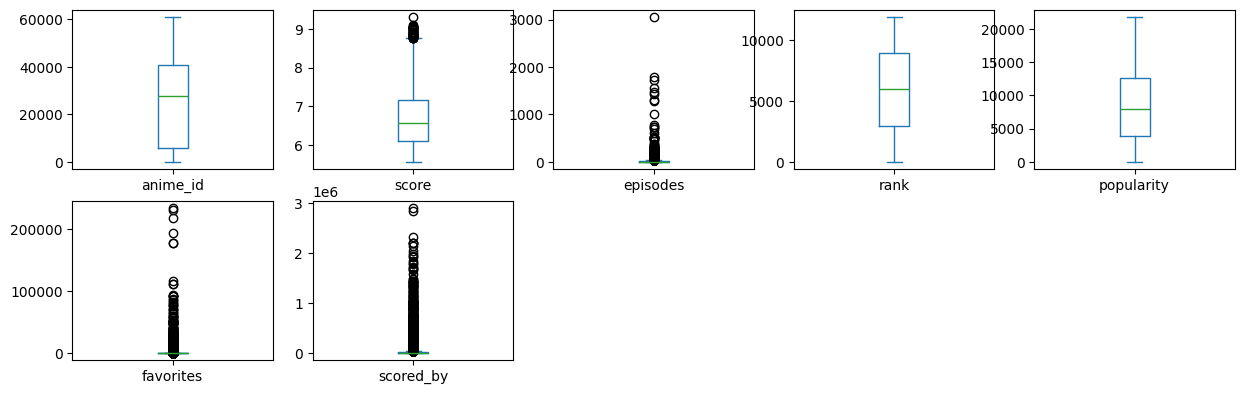

In [ ]:
# phát hiện outliers -> dùng box.plot

anime[numeric_columns].plot(kind='box', subplots=True, layout=(5, 5), figsize=(15, 12), sharex=False, sharey=False)
plt.show()

=> Các cột có khả năng có Outlier: Score, episode, favorite, scored_by . vì chúng có nhiều cột bị null

In [ ]:
from scipy.stats import stats
import numpy as np

In [ ]:
# Check Outlier score
stats.skew(anime['score'])

np.float64(0.5469954871799838)

In [ ]:
anime['episodes'] = pd.to_numeric(anime['episodes'], errors='coerce')

# Drop NaN trước, rồi tính skew
stats.skew(anime['episodes'].dropna())

np.float64(30.163275881673954)

In [ ]:
stats.skew(anime['favorites'])

np.float64(21.005443597829036)

In [ ]:
stats.skew(anime['scored_by'])

np.float64(8.770007441930419)

**Nhận xét:**
a. 'score' có nhiều outlier ở phần trên, các anime được chấm điểm cao hiếm và khác biệt với phần còn lại. Nhưng outlier này hợp lý vì phản ánh sự xuất sắc của 1 số anime như Gintama,...

b. 'episode' có nhiều outlier phía trên, nghĩa là các anime có số tập rất cao. Phân bố lệch phải mạnh (skew >30), so với phần lớn aninem dưới 25 tập.

c. 'favorites' & 'scored_by' đều có nhiều outlier phía trên. Có thể do 1 số anime có số lượng fan khổng lồ -> được yêu thich và điểm cao

# 3. Phân tích độ phổ biến: xác định top 10 anime có số lượt  yêu thích cao nhất (tính theo cột “favorites”)? Vẽ biểu đồ minh họa và nhận xét kết quả.


In [ ]:
# làm sạch cột english_name
anime['english_name'].replace('', pd.NA)


,english_name
0,Frieren: Beyond Journey's End
1,Fullmetal Alchemist: Brotherhood
2,Steins;Gate
3,NaN
4,Attack on Titan Season 3 Part 2
...,...
14995,Beast City
14996,NaN
14997,NaN
14998,Papa's March


In [ ]:
top10_favorite = anime.sort_values(by="favorites", ascending=False).head(10)
top10_favorite

,anime_id,english_name,score,genres,synopsis,type,episodes,premiered,producers,studios,source,duration,Age_can_read,rank,popularity,favorites,scored_by
55,21,One Piece,8.73,"Action, Adventure, Fantasy",Barely surviving in a barrel after passing thr...,TV,NaN,fall 1999,"Fuji TV, TAP, Shueisha",Toei Animation,Manga,24 min,PG-13 - Teens 13 or older,51.0,17,234344,1417472
1,5114,Fullmetal Alchemist: Brotherhood,9.10,"Action, Adventure, Drama, Fantasy",After a horrific alchemy experiment goes wrong...,TV,64.0,spring 2009,"Aniplex, Square Enix, Mainichi Broadcasting Sy...",Bones,Manga,24 min per ep,R - 17+ (violence & profanity),2.0,3,231928,2196353
7,11061,Hunter x Hunter,9.03,"Action, Adventure, Fantasy",Hunters devote themselves to accomplishing haz...,TV,148.0,fall 2011,"VAP, Nippon Television Network, Shueisha",Madhouse,Manga,23 min per ep,PG-13 - Teens 13 or older,8.0,8,218449,1852164
2,9253,Steins;Gate,9.07,"Drama, Sci-Fi, Suspense",Eccentric scientist Rintarou Okabe has a never...,TV,24.0,spring 2011,"Frontier Works, Media Factory, Kadokawa Shoten...",White Fox,Visual novel,24 min per ep,PG-13 - Teens 13 or older,3.0,14,194507,1449844
92,1535,Death Note,8.62,"Supernatural, Suspense","Brutal murders, petty thefts, and senseless vi...",TV,37.0,fall 2006,"VAP, Nippon Television Network, Shueisha, D.N....",Madhouse,Manga,23 min per ep,R - 17+ (violence & profanity),89.0,2,178500,2848272
116,16498,Attack on Titan,8.56,"Action, Award Winning, Drama, Suspense","Centuries ago, mankind was slaughtered to near...",TV,25.0,spring 2013,"Production I.G, Dentsu, Mainichi Broadcasting ...",Wit Studio,Manga,24 min per ep,R - 17+ (violence & profanity),116.0,1,178145,2904954
313,1735,Naruto Shippuden,8.28,"Action, Adventure, Fantasy",It has been two and a half years since Naruto ...,TV,500.0,winter 2007,"TV Tokyo, Aniplex, KSS, Rakuonsha, TV Tokyo Mu...",Pierrot,Manga,23 min per ep,PG-13 - Teens 13 or older,303.0,16,115525,1726867
64,1575,Code Geass: Lelouch of the Rebellion,8.70,"Action, Award Winning, Drama, Sci-Fi","In the year 2010, the Holy Empire of Britannia...",TV,25.0,fall 2006,"Bandai Visual, Mainichi Broadcasting System, B...",Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),61.0,22,111695,1449605
234,30,Neon Genesis Evangelion,8.36,"Action, Avant Garde, Award Winning, Drama, Sci...",Fifteen years after a cataclysmic event known ...,TV,26.0,fall 1995,"TV Tokyo, Kadokawa Shoten, Nihon Ad Systems, A...","Gainax, Tatsunoko Production",Original,24 min per ep,PG-13 - Teens 13 or older,230.0,45,110742,1138537
118,40748,Jujutsu Kaisen,8.56,"Action, Award Winning, Supernatural",Idly indulging in baseless paranormal activiti...,TV,24.0,fall 2020,"Mainichi Broadcasting System, TOHO animation, ...",MAPPA,Manga,23 min per ep,R - 17+ (violence & profanity),109.0,13,93177,1811091


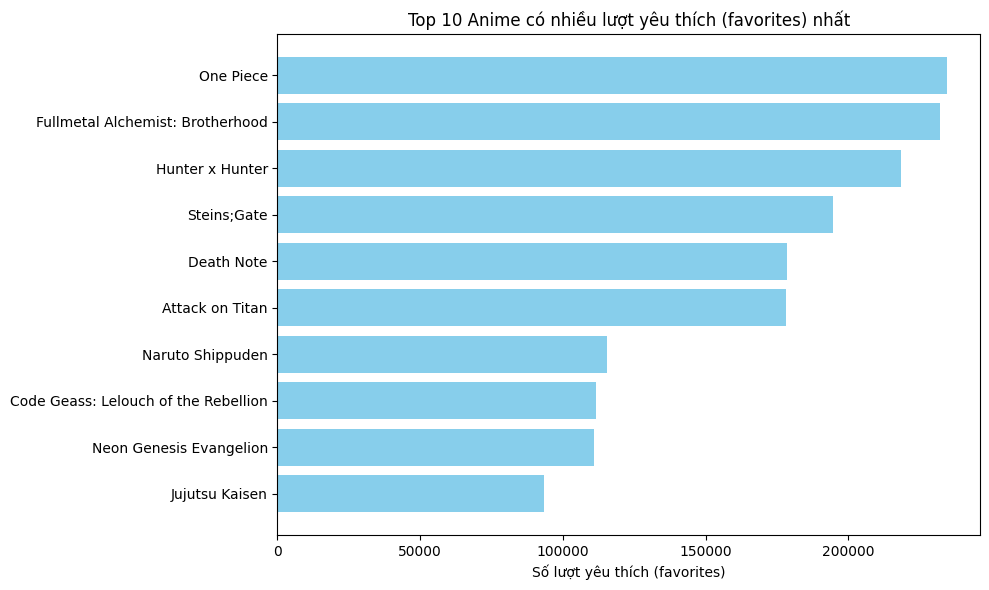

In [ ]:
plt.figure(figsize=(10,6))
plt.barh(top10_favorite["english_name"], top10_favorite["favorites"], color='skyblue')
plt.gca().invert_yaxis()  # để anime đứng đầu nằm trên cùng
plt.title("Top 10 Anime có nhiều lượt yêu thích (favorites) nhất")
plt.xlabel("Số lượt yêu thích (favorites)")
plt.tight_layout()
plt.show()


**Nhận xét:**
- Phân bố favorite: lệch phải (như trên skew)
- Hầu hết đều có lượt yêu thích lớn( trên 100000 người)
- Điểm trung bình đều cao (>8)

-> chỉ số 'favorite' phản ánh tình cảm và mức độ gắn bó của người xemm hơn là điểm chất lượng

-> Các anime có lượng fan lớn (như One Piece, Death Note	) dù ko có điểm cao nhất nhưng vẫn rất được yêu thích -> thương hiệu mạnh.


# 4. So sánh đánh giá trung bình theo loại anime: so sánh điểm trung bình (score) theo từng loại anime (type). Vẽ biểu đồ minh họa và nhận xét kết quả.


In [ ]:
#Tính điểm trung bình score theo từng type.
anime['score'].replace('', pd.NA)

score_avg = anime.groupby('type')['score'].mean().sort_values(ascending= True).head(10)
score_avg

,score
type,
CM,6.074515
Music,6.291685
PV,6.367109
OVA,6.511350
ONA,6.554542
Special,6.587444
TV Special,6.621571
Movie,6.823273
TV,6.929839


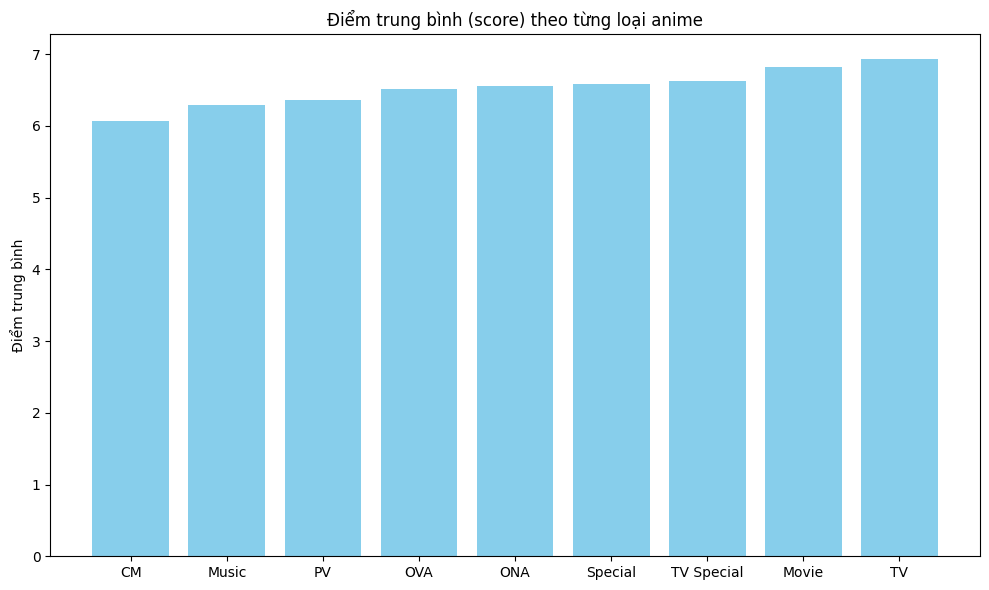

In [ ]:
score_avg = anime.groupby('type')['score'].mean().sort_values(ascending= True).head(10)
plt.figure(figsize=(10,6))
plt.bar(score_avg.index, score_avg.values, color='skyblue') # để anime đứng đầu nằm trên cùng
plt.title("Điểm trung bình (score) theo từng loại anime")
plt.ylabel("Điểm trung bình")
plt.tight_layout()
plt.show()

**Nhận xét:**
- TV (6,92) và Movie(6,82) là 2 loại anime có chất lượng được đánh giá cao nhất => hai loại này được đầu tư về hình ảnh và nội dung => sản phẩm người xem thấy chất lượng tốt nên cho điểm cao.
- Tương tự CM, Music, PV (dưới 6.4) có điểm thấp có thể do đặc thù nội dung ngắn, hoặc dùng quảng cáo, ít được đánh giá cao về nội dung.

=> Loại hình phát hành của anime có ảnh hưởng rõ rệt đến mức độ đầu tư cho sản phẩm và cảm nhận của người xem

# 5.  Phân tích xu hướng phát hành qua các năm dựa trên cột "premiered", thống kê số lượng anime được phát hành theo từng năm? Vẽ biểu đồ minh họa và nhận xét kết quả.


In [ ]:
# Tách year từ premiered
anime['score'].replace('', pd.NA)
anime['year'] = anime['premiered'].str.split().str[-1].astype('Int64')
anime_year = anime.groupby('year').size().reset_index(name='count')

anime_year

,year,count
0,1961,1
1,1962,1
2,1963,5
3,1964,3
4,1965,8
...,...,...
60,2021,185
61,2022,178
62,2023,210
63,2024,215


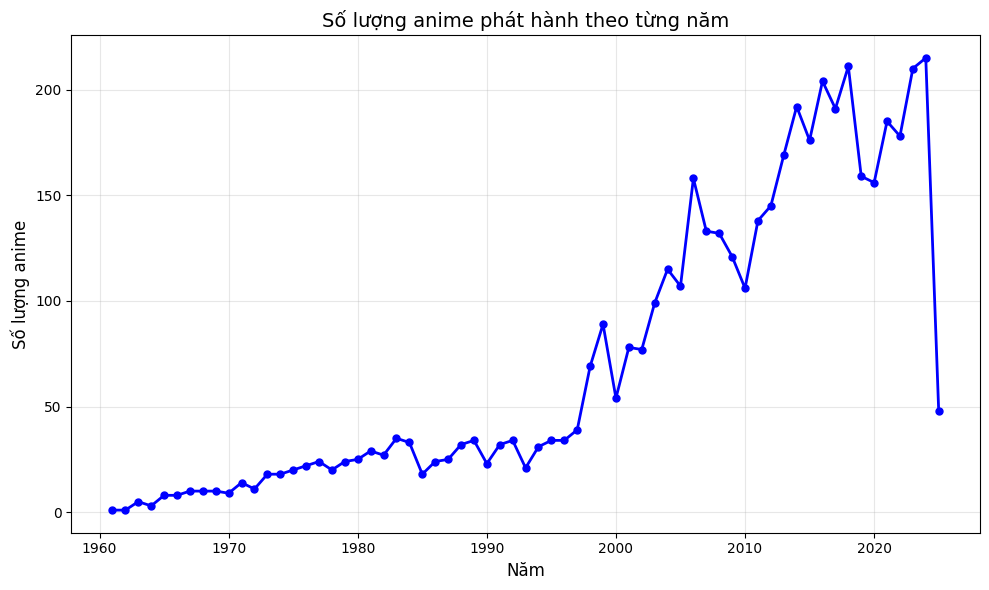

In [ ]:
# Vẽ biểu đồ đường thể hiện xu hướng (Hoặc miền cũng được)

plt.figure(figsize=(10, 6))
plt.plot(anime_year['year'], anime_year['count'],
         color='blue', marker='o', linewidth=2, markersize=5)

plt.title('Số lượng anime phát hành theo từng năm', fontsize=14)
plt.xlabel('Năm', fontsize=12)
plt.ylabel('Số lượng anime', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

**Nhận xét:** Biểu đồ cho thấy sự phát triển rõ rệt của ngành công nghiệp anime theo từng giao đoạn.
Tuy có giai đoạn khá chững lại vào những năm 80 -90, nhưng nhìn chung sau 2010 số lượng anime phát hành dao động quanh 150 -200 bộ/năm.
Sau 2020,có thể giảm nhẹ số lượng do ảnh hưởng đại dịch Covid -19
=> Xu hướng anime tăng dài hạn rõ ràng, phản ánh sự mở rộng mạnh mẽ của ngành này. Đặc biệt đỉnh cao ở 2010-2020.

# 6. Thể loại anime nào được cộng đồng đánh giá cao nhất, khi phân tích điểm trung bình dựa trên cột "score" theo từng "genres"? Vẽ biểu đồ minh họa và nhận xét kết quả.


In [ ]:
# Tách thể loại anime trong genres
# loại bỏ na
anime['genres_dropna'] = anime['genres'].dropna()

anime['genres_list'] = anime['genres'].fillna('').astype(str).str.split(',')
#exploded để mỗi genres trong genres_list thành từng hàng
anime_exploded = anime.explode('genres_list')
# df = df.explode('genres_list')
anime_exploded['genres_list'] = anime_exploded['genres_list'].str.strip()
anime_exploded = anime_exploded[anime_exploded['genres_list'].ne('')]            # bỏ chuỗi rỗng
anime_exploded = anime_exploded.dropna(subset=['score'])             # cần điểm để tính mean
anime_exploded


,anime_id,english_name,score,genres,synopsis,type,episodes,premiered,producers,studios,source,duration,Age_can_read,rank,popularity,favorites,scored_by,year,genres_dropna,genres_list
0,52991,Frieren: Beyond Journey's End,9.31,"Adventure, Drama, Fantasy",During their decade-long quest to defeat the D...,TV,28.0,fall 2023,"Aniplex, Dentsu, Shogakukan-Shueisha Productio...",Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,1.0,160,63200,603520,2023,"Adventure, Drama, Fantasy",Adventure
0,52991,Frieren: Beyond Journey's End,9.31,"Adventure, Drama, Fantasy",During their decade-long quest to defeat the D...,TV,28.0,fall 2023,"Aniplex, Dentsu, Shogakukan-Shueisha Productio...",Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,1.0,160,63200,603520,2023,"Adventure, Drama, Fantasy",Drama
0,52991,Frieren: Beyond Journey's End,9.31,"Adventure, Drama, Fantasy",During their decade-long quest to defeat the D...,TV,28.0,fall 2023,"Aniplex, Dentsu, Shogakukan-Shueisha Productio...",Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,1.0,160,63200,603520,2023,"Adventure, Drama, Fantasy",Fantasy
1,5114,Fullmetal Alchemist: Brotherhood,9.10,"Action, Adventure, Drama, Fantasy",After a horrific alchemy experiment goes wrong...,TV,64.0,spring 2009,"Aniplex, Square Enix, Mainichi Broadcasting Sy...",Bones,Manga,24 min per ep,R - 17+ (violence & profanity),2.0,3,231928,2196353,2009,"Action, Adventure, Drama, Fantasy",Action
1,5114,Fullmetal Alchemist: Brotherhood,9.10,"Action, Adventure, Drama, Fantasy",After a horrific alchemy experiment goes wrong...,TV,64.0,spring 2009,"Aniplex, Square Enix, Mainichi Broadcasting Sy...",Bones,Manga,24 min per ep,R - 17+ (violence & profanity),2.0,3,231928,2196353,2009,"Action, Adventure, Drama, Fantasy",Adventure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14991,4379,Inmu: Feast of Victims,5.57,"Supernatural, Hentai",The first night-Yuumi is raped by a sexual mol...,OVA,2.0,NaN,Pink Pineapple,PP Project,Original,28 min per ep,Rx - Hentai,NaN,11040,5,768,<NA>,"Supernatural, Hentai",Hentai
14992,35996,I Will Be Normal Tomorrow,5.57,"Romance, Sci-Fi",A special included on Indie Anibox: Selma Danb...,Special,1.0,NaN,NaN,NaN,Original,4 min,G - All Ages,11916.0,18068,1,138,<NA>,"Romance, Sci-Fi",Romance
14992,35996,I Will Be Normal Tomorrow,5.57,"Romance, Sci-Fi",A special included on Indie Anibox: Selma Danb...,Special,1.0,NaN,NaN,NaN,Original,4 min,G - All Ages,11916.0,18068,1,138,<NA>,"Romance, Sci-Fi",Sci-Fi
14995,1595,Beast City,5.57,Hentai,The modern age. Albeit tales of strange things...,OVA,3.0,NaN,"Comstock, Ltd.",C and R,Light novel,41 min per ep,Rx - Hentai,NaN,10513,9,883,<NA>,Hentai,Hentai


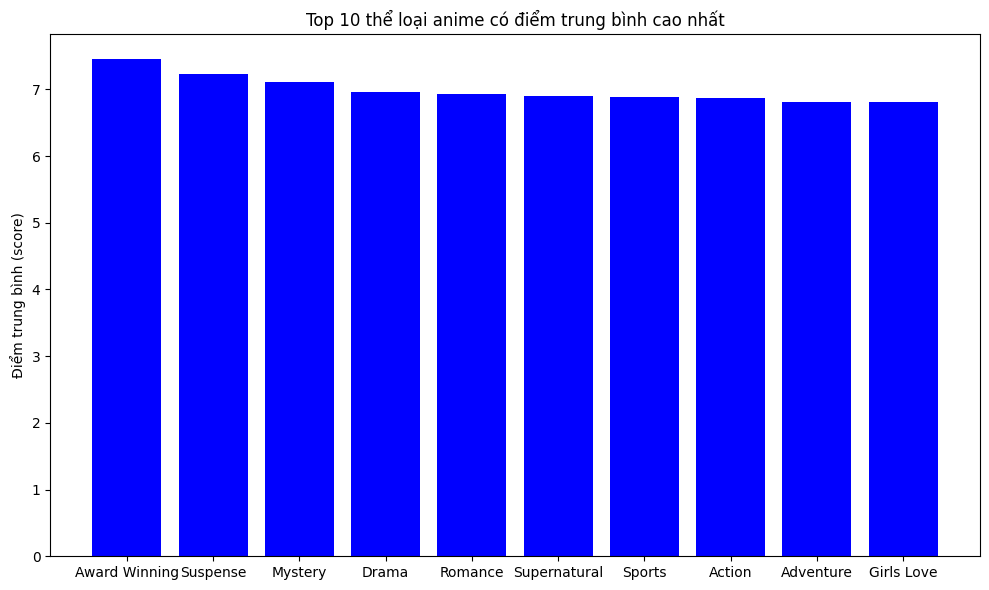

In [ ]:
# Vẽ biểu đồ cột dọc

genre_score_avg = anime_exploded.groupby('genres_list')['score'].mean().sort_values(ascending= False).head(10)
plt.figure(figsize=(10,6))
plt.bar(genre_score_avg.index, genre_score_avg.values, color='blue')
plt.title("Top 10 thể loại anime có điểm trung bình cao nhất")
plt.ylabel("Điểm trung bình (score)")
plt.tight_layout()
plt.show()


In [ ]:
genre_score_avg = anime_exploded.groupby('genres_list')['score'].mean().sort_values(ascending= False).head(10)
genre_score_avg

,score
genres_list,
Award Winning,7.450861
Suspense,7.226094
Mystery,7.109165
Drama,6.966400
Romance,6.935866
Supernatural,6.893091
Sports,6.880750
Action,6.876191
Adventure,6.812033


**Nhận xét:**
- Dữ liệu có nhiều chỗ không điền, loại bỏ hoặc fillna để xử lý tốt hơn.
- Với các Award Winning điểm cao nhất (7.45) cho thấy sự đầu tư và chỉnh chu trong từng sản phẩm sẽ sản xuất được các sản phẩm tốt -> dễ nhận được đánh giá tốt từ giới chuyên môn và người xem, và dễ đạt điểm cao trong các lần đánh giá.

- Với các thể loại: "Suspense”, “Mystery”, “Drama” và “Romance” (đều từ 6,92 đến 7,22) — những thể loại có cốt truyện hấp dẫn, kịch tính, dễ tạo ấn tượng mạnh với người xem.
→ Điều này cho thấy người xem thường đánh giá cao nội dung có chiều sâu, cảm xúc và bất ngờ.

- Các thể loại: Action, Adventure (từ 6.8 - 6.90) cũng trong top 10, nhưng có điểm trung bình thấp hơn có thể do chất lượng ít được đầu tư hơn.
-> có thể tập trung phát triển và sáng tạo nội dung giàu ý nghĩa để nâng cao đánh giá tổng thể và mức độ yêu thích của khán giả.